In [2]:
# Sub-Task 1: Input — Updated Values Created Automatically

# Flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F1', 7, 9),
    ('F2', 8, 10),
    ('F3', 11, 13),
    ('F4', 14, 17),
    ('F5', 9, 12),
    ('F6', 16, 18),
    ('F7', 13, 15)
]

# Crew members
crew_members = ['C1', 'C2', 'C3', 'C4']

MIN_REST = 1

In [3]:
# Sub-Task 2: Approach (Backtracking)

MIN_REST = 1

def is_valid_assignment(new_flight, assigned_flights, min_rest=MIN_REST):
    """Check if assigning a flight to a crew member is time-feasible."""
    _, start, end = new_flight
    for _, s, e in assigned_flights:
        if not (end + min_rest <= s or e + min_rest <= start):
            return False
    return True


def assign_flights_backtracking(flights, crews, min_rest=MIN_REST):
    """Recursive backtracking algorithm to assign flights to crews."""
    assignment = {c: [] for c in crews}
    calls = {"count": 0}

    def backtrack(index):
        calls["count"] += 1
        if index == len(flights):
            return True

        flight = flights[index]

        for crew in crews:
            if is_valid_assignment(flight, assignment[crew], min_rest):
                assignment[crew].append(flight)
                if backtrack(index + 1):
                    return True
                assignment[crew].pop()

        return False

    ok = backtrack(0)
    return (assignment if ok else None), calls["count"]

In [4]:
def assignment_to_mapping(assign_dict):
    return {c: [f[0] for f in sorted(assign_dict[c], key=lambda x: x[1])]
            for c in assign_dict}

solution, calls = assign_flights_backtracking(flights, crew_members)

print("✅ Assignment Mapping:")
print(assignment_to_mapping(solution) if solution else "No valid schedule found.")
print("Recursive Calls:", calls)

✅ Assignment Mapping:
{'C1': ['F1', 'F3', 'F4'], 'C2': ['F2', 'F7', 'F6'], 'C3': ['F5'], 'C4': []}
Recursive Calls: 8


In [5]:
# Sub-Task 4: Analysis

print("🧩 ANALYSIS")
print("• Airline crew scheduling belongs to NP-hard optimization problems.")
print("• Backtracking explores all possible crew-flight assignments.")
print("• Time complexity ≈ O(k × 2^n), where n = flights, k = crew members.")
print("• Suitable only for small datasets.")
print("• Optimization alternatives:")
print("  – Greedy heuristics")
print("  – Linear programming (PuLP, OR-Tools)")
print("  – Constraint solvers (OR-Tools CP-SAT)")

🧩 ANALYSIS
• Airline crew scheduling belongs to NP-hard optimization problems.
• Backtracking explores all possible crew-flight assignments.
• Time complexity ≈ O(k × 2^n), where n = flights, k = crew members.
• Suitable only for small datasets.
• Optimization alternatives:
  – Greedy heuristics
  – Linear programming (PuLP, OR-Tools)
  – Constraint solvers (OR-Tools CP-SAT)


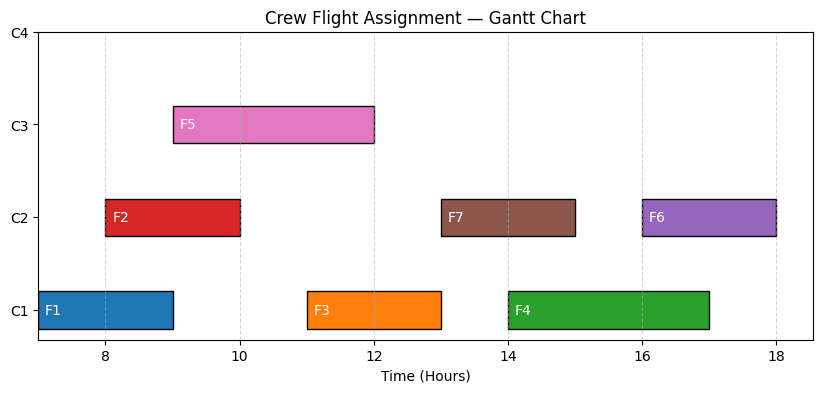

In [11]:
import matplotlib.pyplot as plt

def plot_gantt(assign):
    if not assign:
        print("No schedule to visualize.")
        return

    crews = list(assign.keys())
    plt.figure(figsize=(10, 4))

    for i, crew in enumerate(crews):
        for flight in assign[crew]:
            fid, s, e = flight
            plt.barh(i, e-s, left=s, edgecolor='black', height=0.4)
            plt.text(s+0.1, i, fid, color='white', va='center')

    plt.yticks(range(len(crews)), crews)
    plt.xlabel("Time (Hours)")
    plt.title("Crew Flight Assignment — Gantt Chart")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

plot_gantt(solution)

Flights=4, Time=0.00010s, Mem=0.001MB, Calls=5
Flights=5, Time=0.00008s, Mem=0.001MB, Calls=6
Flights=6, Time=0.00006s, Mem=0.001MB, Calls=7
Flights=7, Time=0.00005s, Mem=0.001MB, Calls=8
Flights=8, Time=0.00006s, Mem=0.001MB, Calls=9
Flights=9, Time=0.00006s, Mem=0.001MB, Calls=10


<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

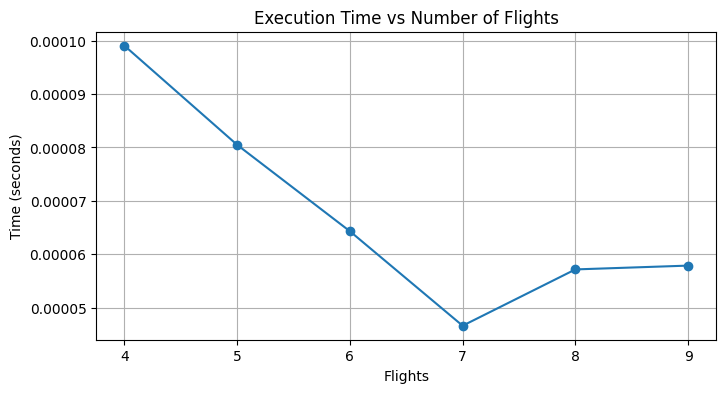

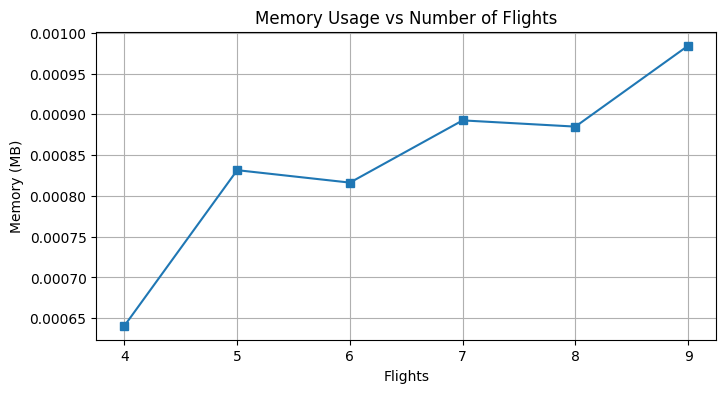

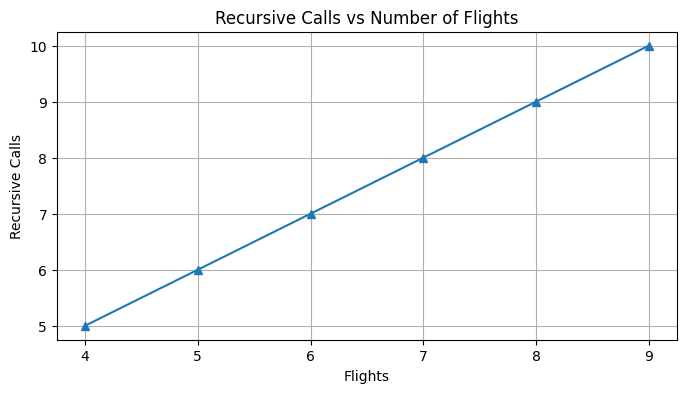


📊 DISCUSSION:
• Execution grows exponentially as flights increase.
• Memory increases due to recursion stack.
• Confirms NP-hard nature — exponential complexity.

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k × 2ⁿ)
Space Complexity →  O(n + k)
Problem Type     →  NP-Hard


In [10]:
import time, tracemalloc, random

def generate_random_flights(n, start_hour=6, end_hour=22):
    data = []
    for i in range(n):
        dur = random.randint(1, 3)
        s = random.randint(start_hour, end_hour - dur)
        e = s + dur
        data.append((f'F{i+1}', s, e))
    return data


def profile_run(flights_n, crew_list):
    tracemalloc.start()
    t0 = time.perf_counter()
    _, calls = assign_flights_backtracking(flights_n, crew_list)
    t1 = time.perf_counter()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return t1 - t0, peak / (1024*1024), calls


sizes = [4, 5, 6, 7, 8, 9]
times, mems, recs = [], [], []

for n in sizes:
    fl = generate_random_flights(n)
    t, m, c = profile_run(fl, crew_members)
    times.append(t); mems.append(m); recs.append(c)
    print(f"Flights={n}, Time={t:.5f}s, Mem={m:.3f}MB, Calls={c}")

    plt.figure(figsize=(8, 4))
plt.plot(sizes, times, marker='o')
plt.title("Execution Time vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(sizes, mems, marker='s')
plt.title("Memory Usage vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Memory (MB)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(sizes, recs, marker='^')
plt.title("Recursive Calls vs Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Recursive Calls")
plt.grid(True)
plt.show()
print("\n📊 DISCUSSION:")
print("• Execution grows exponentially as flights increase.")
print("• Memory increases due to recursion stack.")
print("• Confirms NP-hard nature — exponential complexity.")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k × 2ⁿ)")
print("Space Complexity →  O(n + k)")
print("Problem Type     →  NP-Hard")